In [65]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import figure

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [196]:
h1 = pd.read_csv('h1_proc2.csv')

In [197]:
h1.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatusDate', 'agent', 'company',
       'room_type_difference', 'No Deposit', 'Non Refund', 'Refundable',
       'Contract', 'Group', 'Transient', 'Transient-Party'],
      dtype='object')

In [198]:
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,agent,company,room_type_difference,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party
0,0,342,2015,July,27,1,0,0,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,July,27,1,0,0,2,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,July,27,1,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,13,2015,July,27,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
4,0,14,2015,July,27,1,0,2,2,0,...,1,0,0,1,0,0,0,0,1,0


In [201]:
# columns to use in model
#model_cols = ['CustomerType', 'room_type_difference', 'deposit_type', 'agent',]
model_cols = h1.drop(['IsCanceled', 'ArrivalDateMonth', 'Agent', 'Company',
         'ReservationStatusDate', 'DistributionChannel',
        'MarketSegment', 'DepositType', 'ReservedRoomType', 'AssignedRoomType',
         'CustomerType'], axis=1).columns

X_train, X_test, y_train, y_test = train_test_split(
    h1[model_cols], 
    h1['IsCanceled'], 
    test_size=.4, 
    random_state=1
)

In [203]:
clf = DecisionTreeClassifier(ccp_alpha=.001)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test), '\n')

pd.Series(clf.feature_importances_*100, index=model_cols)

0.8039351269801358 



LeadTime                       15.498790
ArrivalDateYear                 0.000000
ArrivalDateWeekNumber           0.000000
ArrivalDateDayOfMonth           0.000000
StaysInWeekendNights            0.000000
StaysInWeekNights               0.828535
Adults                          0.000000
Children                        0.000000
Babies                          0.000000
Meal                            0.779340
IsRepeatedGuest                 0.000000
PreviousCancellations           6.392403
PreviousBookingsNotCanceled     0.000000
BookingChanges                  4.199505
DaysInWaitingList               0.000000
ADR                             3.367492
RequiredCarParkingSpaces       11.616921
TotalOfSpecialRequests          4.627803
agent                           0.000000
company                         0.000000
room_type_difference           11.972072
No Deposit                      0.000000
Non Refund                     29.647437
Refundable                      0.000000
Contract        

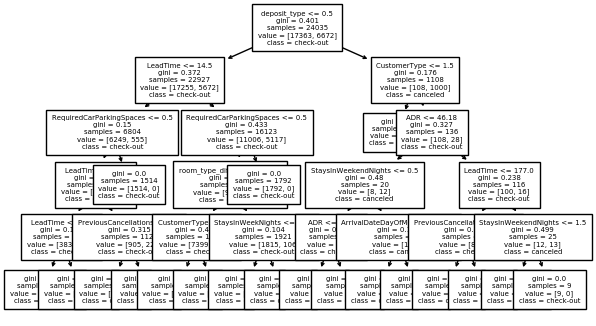

In [158]:
figure(figsize=(5, 3), dpi=100)
tree.plot_tree(clf, feature_names=clf.feature_names_in_, class_names=['check-out', 'canceled'], fontsize=5);

In [184]:
rf = RandomForestClassifier(
    n_estimators=500,
    min_samples_leaf=30,
    random_state=1)

rf.fit(X_train, y_train)
print(rf.score(X_test, y_test), '\n')

0.8232964546140307 



In [185]:
pd.Series(rf.feature_importances_*100, index=model_cols)

LeadTime                       16.181490
ArrivalDateYear                 1.614451
ArrivalDateWeekNumber           2.183437
ArrivalDateDayOfMonth           1.712456
StaysInWeekendNights            1.017584
StaysInWeekNights               2.179756
Adults                          0.716427
Children                        1.021098
Babies                          0.007090
IsRepeatedGuest                 0.239948
PreviousCancellations           5.260882
PreviousBookingsNotCanceled     0.739461
BookingChanges                  3.205190
DaysInWaitingList               0.094855
ADR                             5.972030
RequiredCarParkingSpaces       11.600372
TotalOfSpecialRequests          3.684198
agent                           1.542977
company                         0.343696
room_type_difference           10.938224
No Deposit                      8.906478
Non Refund                     13.016850
Refundable                      0.128957
Contract                        1.534731
Group           

----

## Models using H2

In [215]:
h2 = pd.read_csv('h2_proc.csv')

In [216]:
model_cols = h2.drop(['IsCanceled', 'ArrivalDateMonth',
         'ReservationStatusDate', 'DistributionChannel',
        'MarketSegment', 'DepositType', 'ReservedRoomType', 'AssignedRoomType',
         'CustomerType'], axis=1).columns

X_train, X_test, y_train, y_test = train_test_split(
    h2[model_cols], 
    h2['IsCanceled'], 
    test_size=.4, 
    random_state=1
)

In [217]:
clf = DecisionTreeClassifier(ccp_alpha=.001)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test), '\n')

pd.Series(clf.feature_importances_*100, index=model_cols)

0.8135760744802959 



LeadTime                        5.678570
ArrivalDateYear                 0.458635
ArrivalDateWeekNumber           0.000000
ArrivalDateDayOfMonth           0.000000
StaysInWeekendNights            0.000000
StaysInWeekNights               0.000000
Adults                          0.000000
Children                        0.000000
Babies                          0.000000
Meal                            0.804003
IsRepeatedGuest                 0.000000
PreviousCancellations           7.176338
PreviousBookingsNotCanceled     2.481562
BookingChanges                  1.720414
Agent                           0.000000
Company                         0.000000
DaysInWaitingList               0.000000
ADR                             2.164641
RequiredCarParkingSpaces        1.598644
TotalOfSpecialRequests          5.738949
room_type_difference            5.202298
No Deposit                     60.837257
Non Refund                      0.000000
Refundable                      0.000000
Contract        

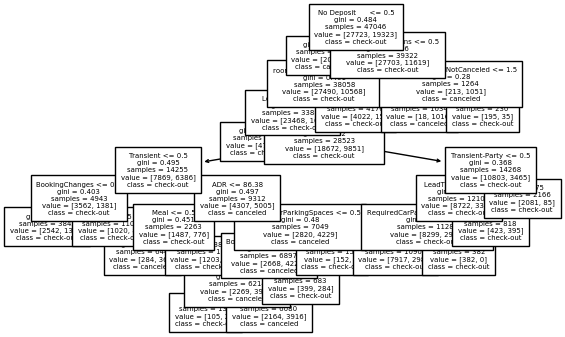

In [218]:
figure(figsize=(5, 3), dpi=100)
tree.plot_tree(clf, feature_names=clf.feature_names_in_, class_names=['check-out', 'canceled'], fontsize=5);

In [219]:
rf = RandomForestClassifier(
    n_estimators=500,
    min_samples_leaf=30,
    random_state=1)

rf.fit(X_train, y_train)
print(rf.score(X_test, y_test), '\n')

0.8297729881392679 



In [220]:
pd.Series(rf.feature_importances_*100, index=model_cols)

LeadTime                       11.021961
ArrivalDateYear                 1.819504
ArrivalDateWeekNumber           2.020933
ArrivalDateDayOfMonth           1.058955
StaysInWeekendNights            0.550318
StaysInWeekNights               0.909060
Adults                          0.882608
Children                        0.200042
Babies                          0.003187
Meal                            0.793816
IsRepeatedGuest                 0.280152
PreviousCancellations           7.501045
PreviousBookingsNotCanceled     0.429270
BookingChanges                  2.684154
Agent                           0.000000
Company                         0.000000
DaysInWaitingList               0.355336
ADR                             4.240726
RequiredCarParkingSpaces        1.108620
TotalOfSpecialRequests         10.780324
room_type_difference            5.562893
No Deposit                     22.513398
Non Refund                     21.024256
Refundable                      0.000000
Contract        